<a href="https://colab.research.google.com/github/Veronicarx77/441B-1/blob/main/Week_8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

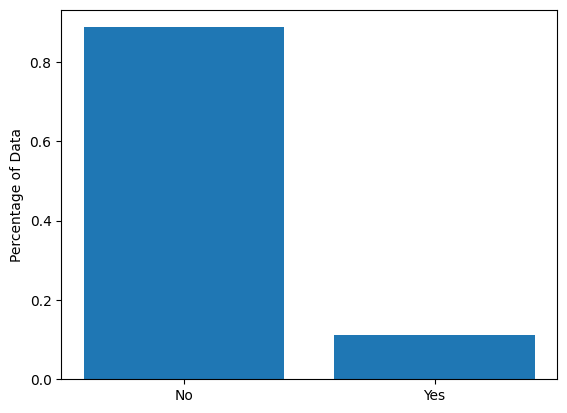

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############

# It shows that the data is imbalanced, so I will use SMOTE to transform the data.
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)

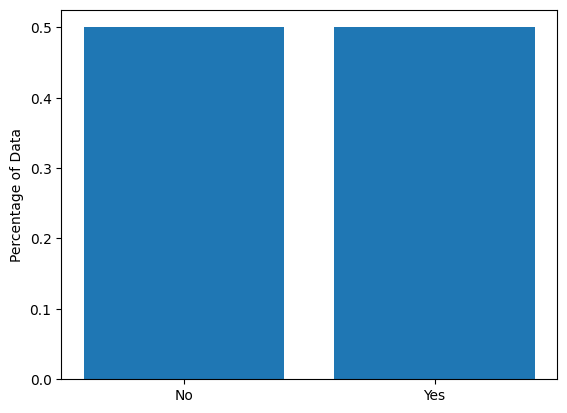

In [12]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [13]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.18\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.288\nsamples = 19541\nvalue = [16126, 3415]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.115\nsamples = 10606\nvalue = [9959, 647]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.094\nsamples = 10384\nvalue = [9868, 516]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.484\nsamples = 222\nvalue = [91, 131]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.316\ngini = 0.428\nsamples = 8935\nvalue = [6167, 2768]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.485\nsamples = 6473\nvalue = [3795, 2678]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.07\nsamples = 2462\nvalue = [2372, 90]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.419\nsamples = 31619\nvalue = [9454, 22165]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.34\nsamples = 25932\nvalue = [5629, 20303]\nclass = Y

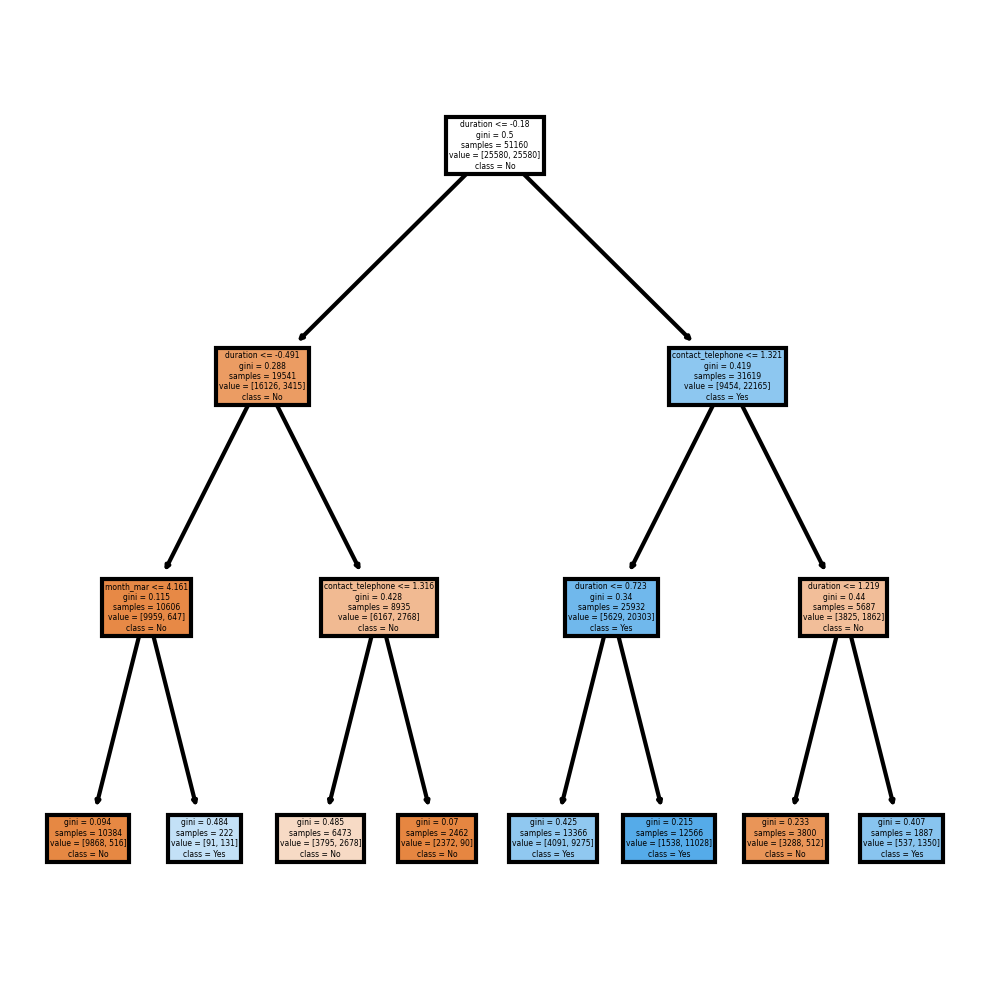

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

In [15]:
y_pred_dt = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred_dt)

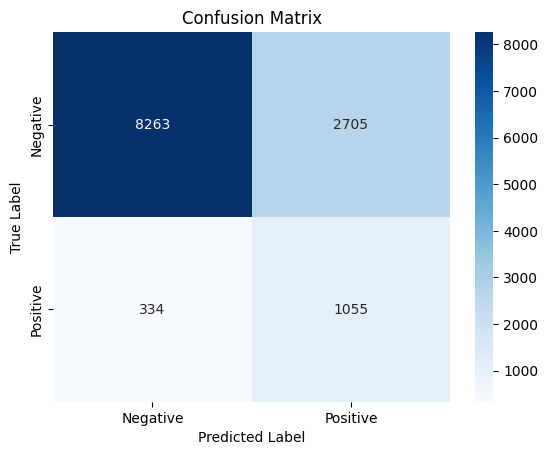

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [17]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred_bag = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_bag)
print("Accuracy:", accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7475924577162741


In [18]:
y_pred_bag = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred_bag)

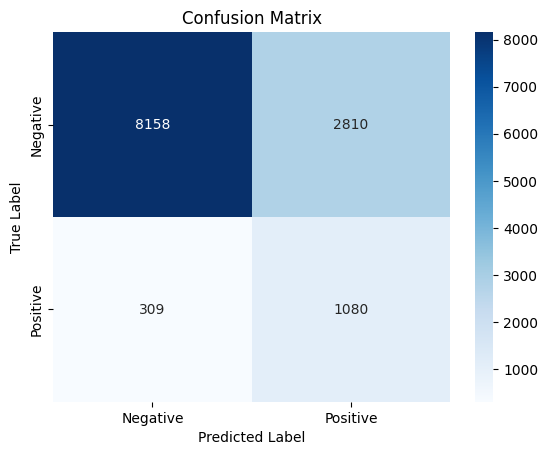

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred_boost = adaboost.predict(X_test)




/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
y_pred_boost = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred_boost)

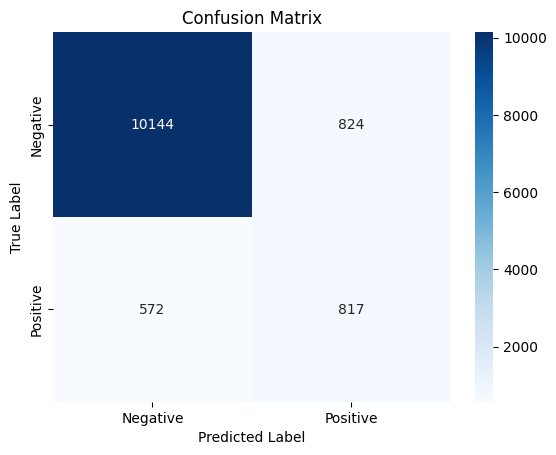

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [24]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [26]:

base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    AdaBoostClassifier()
]

super_learner = SuperLearner(folds=10,random_state=42)
super_learner.add(base_estimators)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [27]:
super_learner.fit(X_scaled,y_train.values.ravel())

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [28]:
base_predictions = super_learner.predict(X_scaled)

In [29]:
### INTERPRET COEFFICIENTS
log_reg = LogisticRegression(fit_intercept =False).fit(base_predictions, y_train.values.ravel())
y_pred_stk = log_reg.predict(super_learner.predict(X_test))

In [30]:
log_reg.coef_

array([[-3.18212267,  9.87486414, -4.70240159, -4.21896158,  9.87486414]])

In [34]:
# Due to the coefficients, we can tell that the ensemble is heavily weighted towards the RandomForestClassifier and AdaboostClassifier, while the other three have a negative contribution to the final prediction.

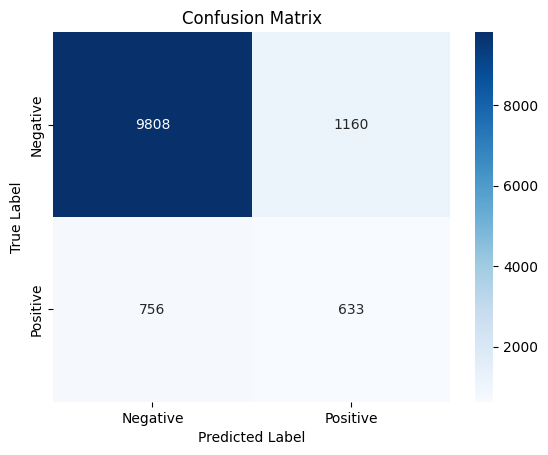

In [31]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_true = y_test
cm_stk = confusion_matrix(y_true,y_pred_stk)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_stk, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [32]:
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

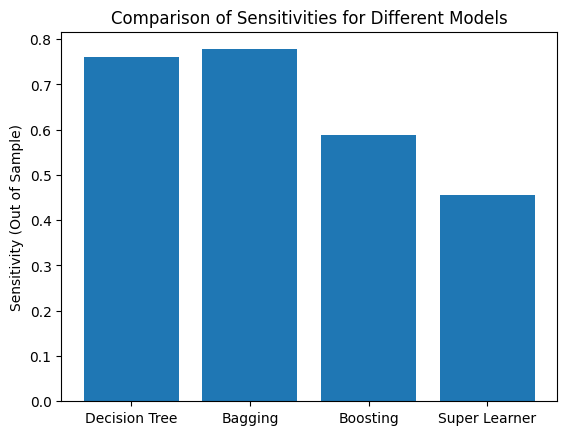

In [33]:
sensitivities = [sensitivity_score(y_test, y_pred_dt), 
                 sensitivity_score(y_test, y_pred_bag), 
                 sensitivity_score(y_test, y_pred_boost), 
                 sensitivity_score(y_test, y_pred_stk)]

# Create a bar chart
models = ['Decision Tree', 'Bagging', 'Boosting', 'Super Learner']
x_pos = np.arange(len(models))
plt.bar(x_pos, sensitivities)
plt.xticks(x_pos, models)
plt.ylabel('Sensitivity (Out of Sample)')
plt.title('Comparison of Sensitivities for Different Models')
plt.show()

In [35]:
# Since we know that from the ensemble with 5 base estimators, 3 of them make negative contribution, which can be the explanation of the low sensitivity score of the superlearner.